<a href="https://colab.research.google.com/github/apfiadiansetianingrum/Praktikum-Struktur-Data/blob/main/2410506004_Tugas_Strukdat_Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#instalasi library
!pip install networkx matplotlib

Jarak dari X ke Z: 9
Jalur: X -> D -> E -> Z


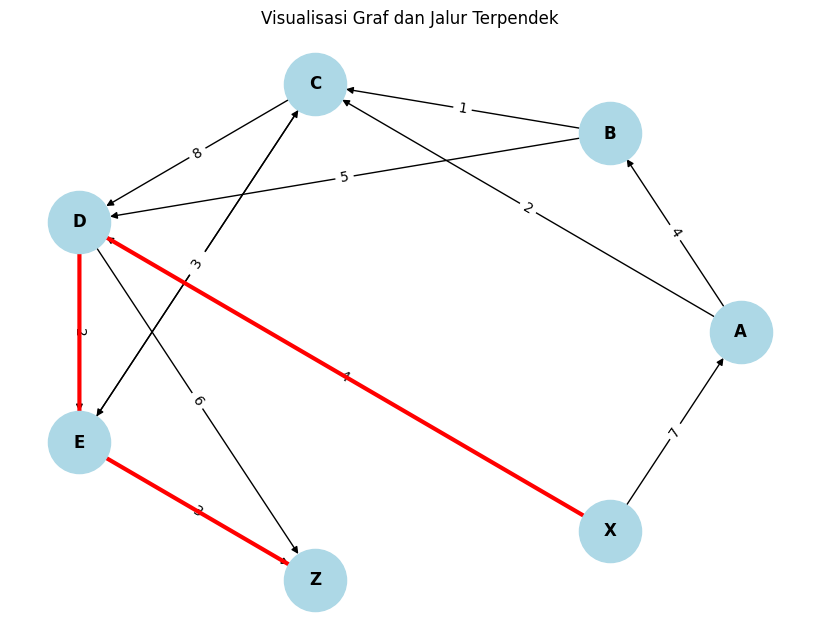

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

#algoritma dijkstra
def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

#fungsi rekonstruksi jalur
def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

#fungsi visualisasi
def visualize_graph(graph, path=None, layout="spring"):
    G = nx.DiGraph()
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    if layout == "spring":
        pos = nx.spring_layout(G)
    elif layout == "circular":
        pos = nx.circular_layout(G)
    elif layout == "kamada":
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    #garis tebal untuk jalur terpendek
    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

#modifikasi
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'C': 3, 'Z': 3},     #siklus: E -> C
    'Z': {},
    'X': {'A': 7, 'D': 4}      #simpul baru X terhubung ke A dan D
}

#jalankan algoritma dari node baru 'X' ke tujuan 'Z'
start_node = 'X'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)
shortest_path = get_path(previous, end_node)

#tampilkan hasil
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' -> '.join(shortest_path)}")

#visualisasi (ganti layout: spring / circular / kamada)
visualize_graph(graph, path=shortest_path, layout="circular")